# Depthwise Separable Convolution
### Reference:
https://arxiv.org/abs/1704.04861

It consists of depthwise convolution and pointwise convolution. To reduce computation cost effectively, researchers factor vanilla convolution into 2 parts.

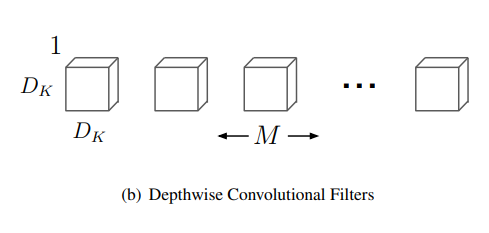

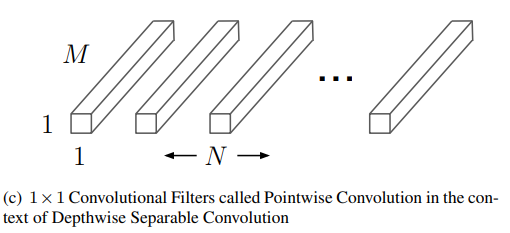

### Building block
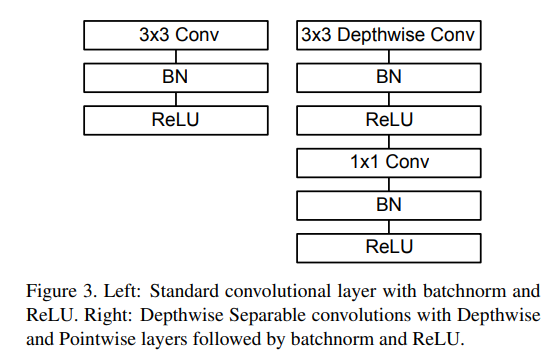

In [4]:
from tensorflow import keras
from keras import layers as KL

In [6]:
def depth_separable_block(x, filter: int, stride: int=1):
  """Args
      filter(int): number of output channel of the block
      stride(int): 2 if resolution is reduced else 1
    Return
      tf.tensor
  """
  assert stride <= 2, 'stride must be 1 or 2'
  x = KL.DepthwiseConv2D(kernel_size=(3, 3), strides=(stride, stride), padding='same', depth_multiplier=1)(x)
  x = KL.BatchNormalization()(x)
  x = KL.ReLU(max_value=6)(x)
  x = KL.Conv2D(filters=filter, kernel_size=(1, 1), padding='valid', strides=(1, 1))(x)
  x = KL.BatchNormalization()(x)
  x = KL.ReLU(max_value=6)(x)
  return x